# Notebbok

## Impoprtação dos Dados

In [1]:
import pandas as pd

In [2]:
try:
    dados = pd.read_csv('datafut.csv', encoding='utf-8')
except UnicodeDecodeError:
    dados = pd.read_csv('datafut.csv', encoding='ISO-8859-1')


In [3]:
dados

,Rank,Player,Nation,Confederation,Goals,Caps,Goals per match,Career span,Date of 50th goal
0,1,Cristiano Ronaldo,Portugal,UEFA,135,217,0.62,2003-,26-Jun-14
1,2,Lionel Messi,Argentina,CONMEBOL,112,190,0.59,2005-,29-Mar-16
2,3,Ali Daei,Iran,AFC,108,148,0.73,1993-2006,9-Jan-00
3,4,Sunil Chhetri,India,AFC,94,151,0.62,2005-2024,31-Dec-15
4,5,Mokhtar Dahari,Malaysia,AFC,89,142,0.63,1972-1985,22-Aug-76
...,...,...,...,...,...,...,...,...,...
77,76,Hwang Sun-hong,South Korea,AFC,50,103,0.49,1988-2002,4-Jun-02
78,76,Tim Cahill,Australia,AFC / OFC,50,108,0.46,2004-2018,10-Oct-17
79,76,Shinji Okazaki,Japan,AFC,50,119,0.42,2008-2019,28-Mar-17
80,76,Zainal Abidin Hassan,Malaysia,AFC,50,129,0.39,1980-1997,31-Mar-97


## Pré Visualização

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               82 non-null     int64  
 1   Player             82 non-null     object 
 2   Nation             82 non-null     object 
 3   Confederation      82 non-null     object 
 4   Goals              82 non-null     int64  
 5   Caps               82 non-null     int64  
 6   Goals per match    82 non-null     float64
 7   Career span        82 non-null     object 
 8   Date of 50th goal  82 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 5.9+ KB


In [5]:
dados.describe()

,Rank,Goals,Caps,Goals per match
count,82.000000,82.000000,82.000000,82.000000
mean,39.926829,64.378049,115.219512,0.596341
std,22.870424,15.322573,31.761855,0.205008
min,1.000000,50.000000,38.000000,0.290000
25%,19.750000,53.500000,97.250000,0.470000
50%,39.000000,59.000000,112.500000,0.570000
75%,60.250000,70.750000,135.500000,0.630000
max,76.000000,135.000000,217.000000,1.420000


In [6]:
dados.isna().sum()

Rank                 0
Player               0
Nation               0
Confederation        0
Goals                0
Caps                 0
Goals per match      0
Career span          0
Date of 50th goal    0
dtype: int64

In [7]:
dados.rename(columns={"Player":"Jogador"}, inplace=True)
dados.rename(columns={"Nation":"Nação"}, inplace=True)
dados.rename(columns={"Confederation":"Confederação"}, inplace=True)
dados.rename(columns={"Goals":"Gols"}, inplace=True)
dados.rename(columns={"Caps":"Partidas_internacionais"}, inplace=True)
dados.rename(columns={"Goals per match":"Gols_por_partida"}, inplace=True)
dados.rename(columns={"Career span":"Carreira_profissional"}, inplace=True)
dados.rename(columns={"Date of 50th goal":"data_50_Gol"}, inplace=True)
dados

,Rank,Jogador,Nação,Confederação,Gols,Partidas_internacionais,Gols_por_partida,Carreira_profissional,data_50_Gol
0,1,Cristiano Ronaldo,Portugal,UEFA,135,217,0.62,2003-,26-Jun-14
1,2,Lionel Messi,Argentina,CONMEBOL,112,190,0.59,2005-,29-Mar-16
2,3,Ali Daei,Iran,AFC,108,148,0.73,1993-2006,9-Jan-00
3,4,Sunil Chhetri,India,AFC,94,151,0.62,2005-2024,31-Dec-15
4,5,Mokhtar Dahari,Malaysia,AFC,89,142,0.63,1972-1985,22-Aug-76
...,...,...,...,...,...,...,...,...,...
77,76,Hwang Sun-hong,South Korea,AFC,50,103,0.49,1988-2002,4-Jun-02
78,76,Tim Cahill,Australia,AFC / OFC,50,108,0.46,2004-2018,10-Oct-17
79,76,Shinji Okazaki,Japan,AFC,50,119,0.42,2008-2019,28-Mar-17
80,76,Zainal Abidin Hassan,Malaysia,AFC,50,129,0.39,1980-1997,31-Mar-97


In [8]:
dados["Rank"].nunique()

31

In [9]:
dados["Jogador"].duplicated().sum()

0

In [10]:
dados["Nação"].nunique()

53

In [11]:
dados["Confederação"].nunique()

6

In [12]:
dados["Gols"].nunique()

31

In [13]:
dados["Gols_por_partida"].nunique()

43

In [14]:
dados["Gols_por_partida"].nunique()

43

In [15]:
dados["Carreira_profissional"].nunique()

70

In [16]:
dados["data_50_Gol"].nunique()

79

## Tratamento

In [17]:
dados["data_50_Gol"] = pd.to_datetime(dados["data_50_Gol"], errors='coerce')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Rank                     82 non-null     int64         
 1   Jogador                  82 non-null     object        
 2   Nação                    82 non-null     object        
 3   Confederação             82 non-null     object        
 4   Gols                     82 non-null     int64         
 5   Partidas_internacionais  82 non-null     int64         
 6   Gols_por_partida         82 non-null     float64       
 7   Carreira_profissional    82 non-null     object        
 8   data_50_Gol              82 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 5.9+ KB


C:\Users\nickg\AppData\Local\Temp\ipykernel_22060\2672016578.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados["data_50_Gol"] = pd.to_datetime(dados["data_50_Gol"], errors='coerce')


## Visualização

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

In [24]:
fig=px.pie(dados,dados["Confederação"],title="Porcentagem por Confederação", color_discrete_sequence=px.colors.sequential.Blues)
fig.update_traces(textinfo='percent+label')
fig.show()


In [38]:
fig = px.bar(x=dados["Rank"].value_counts().index, 
             y=dados["Rank"].value_counts().values, 
             color=dados["Rank"].value_counts().index,labels={'x': 'Rank', 'y': 'Contagem'}, color_continuous_scale=px.colors.sequential.Blues,title='Contagem de Rank')
fig.show()

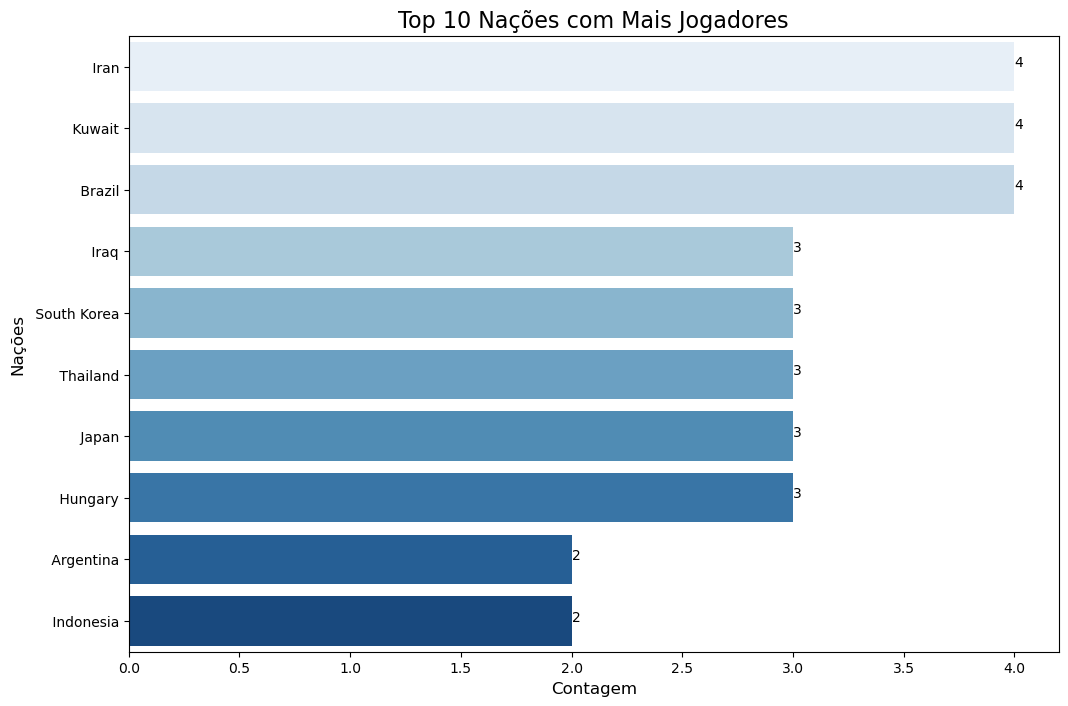

In [37]:
top_Nações = dados[dados['Nação'] != 'Não Mencionado']["Nação"].value_counts().nlargest(10)

dados_filtrado = dados[(dados['Nação'] != 'Não mencionado')]
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_Nações.values, y=top_Nações.index, palette='Blues')
#--------------
for index, value in enumerate(top_Nações):
    ax.text(value, index, str(value))

plt.title('Top 10 Nações com Mais Jogadores', fontsize=16)
plt.xlabel('Contagem', fontsize=12)
plt.ylabel('Nações', fontsize=12)
plt.show()

In [55]:
fig=px.scatter(dados,dados["Gols"],title="Distribuição de Gols",color_discrete_sequence=px.colors.sequential.Bluered)
fig.show()

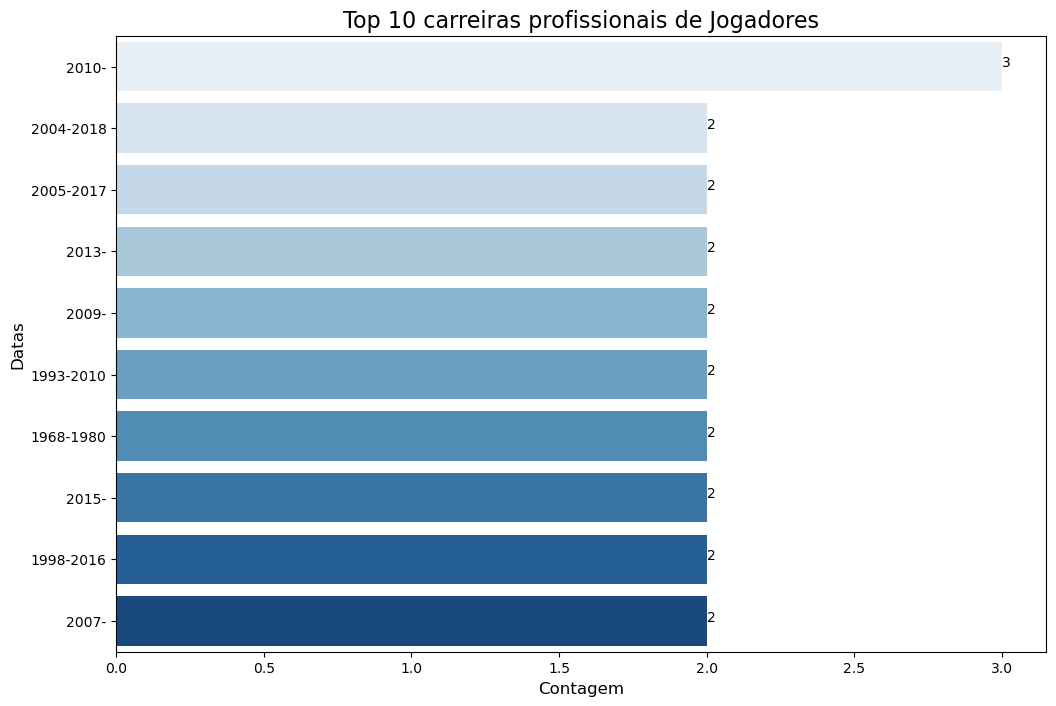

In [49]:
top_carrer = dados[dados['Carreira_profissional'] != 'Não Mencionado']["Carreira_profissional"].value_counts().nlargest(10)

dados_filtrado = dados[(dados['Carreira_profissional'] != 'Não mencionado')]
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_carrer.values, y=top_carrer.index, palette='Blues')
#--------------
for index, value in enumerate(top_carrer):
    ax.text(value, index, str(value))

plt.title('Top 10 carreiras profissionais de Jogadores', fontsize=16)
plt.xlabel('Contagem', fontsize=12)
plt.ylabel('Datas', fontsize=12)
plt.show()

c:\Users\nickg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



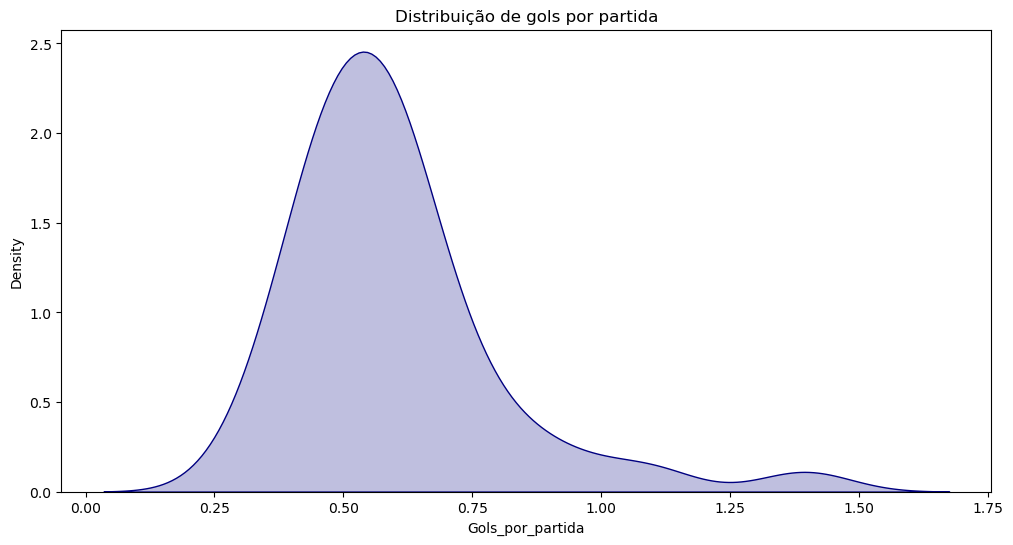

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(dados["Gols_por_partida"], color="#000080", fill=True)
ax.set_title("Distribuição de gols por partida")
plt.show()